In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Dataset

In [2]:
df1 = pd.read_csv("data/scenario1_baseline.csv")
df2 = pd.read_csv("data/scenario2_malicious.csv")

In [3]:
df1

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,189.40,0.0,0.0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,145.70,0.0,0.0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,144.90,0.0,0.0
3,1,OV_1,MAIN_1,9712,40.467,9669,43,0,0,43,...,0,0.0,0,0,0.0,0.0,0.0,194.24,0.0,0.0
4,1,OV_2,MAIN_2,7160,29.833,7160,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,143.20,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,OV_2,MAIN_2,7097,29.571,7094,3,0,0,3,...,0,0.0,0,0,0.0,0.0,0.0,141.94,0.0,0.0
596,198,OV_3,MAIN_3,7258,30.242,7234,9,15,0,24,...,0,0.0,0,0,0.0,0.0,0.0,145.16,0.0,0.0
597,199,OV_1,MAIN_1,9622,40.092,9622,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,192.44,0.0,0.0
598,199,OV_2,MAIN_2,7162,29.842,7162,0,0,0,0,...,0,0.0,0,0,0.0,0.0,0.0,143.24,0.0,0.0


In [4]:
df2

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.00,473.50,0.0,0.000000
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.00,364.25,0.0,0.000000
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.00,362.25,0.0,0.000000
3,1,OV_1,MAIN_1,9712,40.467,7577,0,2135,0,2135,...,2368,7.104,2637,2135,100.0,2367.76,0.00,485.60,0.0,2367.760000
4,1,OV_2,MAIN_2,7160,29.833,7132,27,1,0,28,...,0,0.000,0,0,0.0,0.00,0.00,358.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,OV_2,MAIN_2,7921,33.004,7917,4,0,0,4,...,0,0.000,0,0,0.0,0.00,0.00,396.05,0.0,0.000000
596,198,OV_3,MAIN_3,7663,31.929,7640,9,14,0,23,...,0,0.000,0,0,0.0,0.00,0.00,383.15,0.0,0.000000
597,199,OV_1,MAIN_1,8380,34.917,8380,0,0,0,0,...,4,0.012,0,0,0.0,0.00,0.48,419.00,4.0,3.519996
598,199,OV_2,MAIN_2,7872,32.800,7872,0,0,0,0,...,0,0.000,0,0,0.0,0.00,0.00,393.60,0.0,0.000000


### Check

In [5]:
# 2) Normalizzazione nomi colonne
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

df1 = clean_columns(df1)
df2 = clean_columns(df2)

In [6]:
df1.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg'],
      dtype='object')

In [7]:
df2.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg'],
      dtype='object')

In [8]:
df1.dtypes

epoch                                    int64
overflow                                object
main                                    object
assigned_slots                           int64
share_assigned_slots                   float64
ok                                       int64
skipped                                  int64
invalid                                  int64
delayed                                  int64
bad_slots_abs                            int64
bad_slots_pct_node                     float64
effective_stake                        float64
stake_share_pct                        float64
effective_stake_next                   float64
stake_share_next_pct                   float64
delivered_slots_share_pct              float64
coinbase_epoch_tkg                     float64
fees_epoch_tkr_at_main                 float64
reward_epoch_total_value_tkg_only      float64
coinbase_cum_tkg                       float64
fees_cum_tkr_at_main                   float64
penalty_slots

In [9]:
df2.dtypes

epoch                                    int64
overflow                                object
main                                    object
assigned_slots                           int64
share_assigned_slots                   float64
ok                                       int64
skipped                                  int64
invalid                                  int64
delayed                                  int64
bad_slots_abs                            int64
bad_slots_pct_node                     float64
effective_stake                        float64
stake_share_pct                        float64
effective_stake_next                   float64
stake_share_next_pct                   float64
delivered_slots_share_pct              float64
coinbase_epoch_tkg                     float64
fees_epoch_tkr_at_main                 float64
reward_epoch_total_value_tkg_only      float64
coinbase_cum_tkg                       float64
fees_cum_tkr_at_main                   float64
penalty_slots

### New features

In [10]:
# df1
df1["ok_rate"] = df1["ok"] / df1["assigned_slots"]
df1["scenario"] = 1
df1["assigned_share"] = df1["assigned_slots"] / 24000

In [11]:
# df2
df2["ok_rate"] = df2["ok"] / df2["assigned_slots"]
df2["scenario"] = 2
df2["assigned_share"] = df2["assigned_slots"] / 24000

df2["malicious_i"] = (df2["overflow"] == "OV_1").astype(int)
df2["post_t"] = (df2["epoch"] >= 50).astype(int)
df2["interaction"] = df2["malicious_i"] * df2["post_t"]

df2["time_since_switch"] = np.where(df2["epoch"] >= 50, df2["epoch"] - 50, 0)

### Panel and check

In [12]:
# 4) Concatenazione opzionale
panel = pd.concat([df1, df2], ignore_index=True)

In [13]:
panel

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,189.40,0.0,0.000000,1.000000,1,0.394583,NaN,NaN,NaN,NaN
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,145.70,0.0,0.000000,1.000000,1,0.303542,NaN,NaN,NaN,NaN
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,144.90,0.0,0.000000,1.000000,1,0.301875,NaN,NaN,NaN,NaN
3,1,OV_1,MAIN_1,9712,40.467,9669,43,0,0,43,...,194.24,0.0,0.000000,0.995572,1,0.404667,NaN,NaN,NaN,NaN
4,1,OV_2,MAIN_2,7160,29.833,7160,0,0,0,0,...,143.20,0.0,0.000000,1.000000,1,0.298333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,198,OV_2,MAIN_2,7921,33.004,7917,4,0,0,4,...,396.05,0.0,0.000000,0.999495,2,0.330042,0.0,1.0,0.0,148.0
1196,198,OV_3,MAIN_3,7663,31.929,7640,9,14,0,23,...,383.15,0.0,0.000000,0.996999,2,0.319292,0.0,1.0,0.0,148.0
1197,199,OV_1,MAIN_1,8380,34.917,8380,0,0,0,0,...,419.00,4.0,3.519996,1.000000,2,0.349167,1.0,1.0,1.0,149.0
1198,199,OV_2,MAIN_2,7872,32.800,7872,0,0,0,0,...,393.60,0.0,0.000000,1.000000,2,0.328000,0.0,1.0,0.0,149.0


In [14]:
panel.shape

(1200, 38)

In [15]:
panel.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg', 'ok_rate', 'scenario',
       'assigned_share', 'malicious_i', 'post_t', 'interaction',
       'time_since_switch'],
      dtype='object')

In [16]:
panel.head()

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,189.40,0.0,0.0,1.000000,1,0.394583,NaN,NaN,NaN,NaN
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,145.70,0.0,0.0,1.000000,1,0.303542,NaN,NaN,NaN,NaN
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,144.90,0.0,0.0,1.000000,1,0.301875,NaN,NaN,NaN,NaN
3,1,OV_1,MAIN_1,9712,40.467,9669,43,0,0,43,...,194.24,0.0,0.0,0.995572,1,0.404667,NaN,NaN,NaN,NaN
4,1,OV_2,MAIN_2,7160,29.833,7160,0,0,0,0,...,143.20,0.0,0.0,1.000000,1,0.298333,NaN,NaN,NaN,NaN


In [17]:
# 6) Controlla NaN e valori anomali
panel.isna().sum()

epoch                                    0
overflow                                 0
main                                     0
assigned_slots                           0
share_assigned_slots                     0
ok                                       0
skipped                                  0
invalid                                  0
delayed                                  0
bad_slots_abs                            0
bad_slots_pct_node                       0
effective_stake                          0
stake_share_pct                          0
effective_stake_next                     0
stake_share_next_pct                     0
delivered_slots_share_pct                0
coinbase_epoch_tkg                       0
fees_epoch_tkr_at_main                   0
reward_epoch_total_value_tkg_only        0
coinbase_cum_tkg                         0
fees_cum_tkr_at_main                     0
penalty_slots_residual                   0
penalty_score                            0
forced_inva

In [18]:
df1.isna().sum()

epoch                                  0
overflow                               0
main                                   0
assigned_slots                         0
share_assigned_slots                   0
ok                                     0
skipped                                0
invalid                                0
delayed                                0
bad_slots_abs                          0
bad_slots_pct_node                     0
effective_stake                        0
stake_share_pct                        0
effective_stake_next                   0
stake_share_next_pct                   0
delivered_slots_share_pct              0
coinbase_epoch_tkg                     0
fees_epoch_tkr_at_main                 0
reward_epoch_total_value_tkg_only      0
coinbase_cum_tkg                       0
fees_cum_tkr_at_main                   0
penalty_slots_residual                 0
penalty_score                          0
forced_invalid_slots_planned           0
forced_invalid_s

In [19]:
df2.isna().sum()

epoch                                  0
overflow                               0
main                                   0
assigned_slots                         0
share_assigned_slots                   0
ok                                     0
skipped                                0
invalid                                0
delayed                                0
bad_slots_abs                          0
bad_slots_pct_node                     0
effective_stake                        0
stake_share_pct                        0
effective_stake_next                   0
stake_share_next_pct                   0
delivered_slots_share_pct              0
coinbase_epoch_tkg                     0
fees_epoch_tkr_at_main                 0
reward_epoch_total_value_tkg_only      0
coinbase_cum_tkg                       0
fees_cum_tkr_at_main                   0
penalty_slots_residual                 0
penalty_score                          0
forced_invalid_slots_planned           0
forced_invalid_s

In [20]:
panel.to_csv("dataset/panel.csv", index=False)

### Sanity checks

In [21]:
pd.set_option("display.max_columns", None)  # mostra tutte le colonne
pd.set_option("display.width", 0)           # evita il troncamento orizzontale

In [22]:
df1.groupby("overflow").describe()

epoch                                                    \
          count  mean        std  min    25%   50%     75%    max   
overflow                                                            
OV_1      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_2      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_3      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   

         assigned_slots                                                \
                  count      mean        std     min      25%     50%   
overflow                                                                
OV_1              200.0  9595.220  77.538459  9322.0  9540.75  9603.0   
OV_2              200.0  7211.415  73.055859  7016.0  7160.75  7209.0   
OV_3              200.0  7193.365  73.843524  6978.0  7138.00  7191.5   

                          share_assigned_slots                               \
              75%     max                count       mean       std     min   
overflow                                                                      
OV_1      9648.50  9767.0                200.0  39.980085  0.323120  38.842   
OV_2      7259.00  7425.0                200.0  30.047535  0.304385  29.233   
OV_3      7247.25  7381.0                200.0  29.972330  0.307733  29.075   

                                              ok                               \
             25%      50%     75%     max  count      mean        std     min   
overflow                                                                        
OV_1      39.753  40.0130  40.202  40.696  200.0  9575.150  78.667850  9314.0   
OV_2      29.836  30.0380  30.246  30.938  200.0  7197.950  73.573383  7015.0   
OV_3      29.742  29.9645  30.197  30.754  200.0  7180.655  75.329067  6978.0   

                                           skipped                         \
              25%     50%      75%     max   count   mean        std  min   
overflow                                                                    
OV_1      9523.50  9581.0  9628.00  9748.0   200.0  7.050  11.493389  0.0   
OV_2      7150.25  7198.0  7246.00  7413.0   200.0  5.055   8.213971  0.0   
OV_3      7122.75  7178.5  7237.25  7371.0   200.0  4.790   7.807734  0.0   

                                invalid                                       \
          25%  50%    75%   max   count   mean       std  min  25%  50%  75%   
overflow                                                                       
OV_1      0.0  0.0  11.25  61.0   200.0  3.635  5.357733  0.0  0.0  0.0  7.0   
OV_2      0.0  0.0   7.00  39.0   200.0  2.615  4.460522  0.0  0.0  0.0  4.0   
OV_3      0.0  0.0   8.00  41.0   200.0  2.670  4.196325  0.0  0.0  0.0  4.0   

               delayed                                               \
           max   count   mean        std  min  25%  50%   75%   max   
overflow                                                              
OV_1      24.0   200.0  9.385  12.094136  0.0  0.0  2.0  18.0  47.0   
OV_2      20.0   200.0  5.795   9.074952  0.0  0.0  0.0   9.0  48.0   
OV_3      23.0   200.0  5.250   7.627476  0.0  0.0  0.5   9.0  39.0   

         bad_slots_abs                                                 \
                 count    mean        std  min  25%   50%   75%   max   
overflow                                                                
OV_1             200.0  20.070  16.793906  0.0  7.0  15.5  29.0  70.0   
OV_2             200.0  13.465  13.610843  0.0  2.0  10.0  19.0  59.0   
OV_3             200.0  12.710  12.779376  0.0  3.0   9.0  17.0  64.0   

         bad_slots_pct_node                                               \
                      count     mean       std  min   25%    50%     75%   
overflow                                                                   
OV_1                  200.0  0.20895  0.175609  0.0  0.07  0.165  0.3000   
OV_2                  200.0  0.18650  0.188546  0.0  0.03  0.140  0.2700   
OV_3

In [23]:
df2.groupby("overflow").describe()

epoch                                                    \
          count  mean        std  min    25%   50%     75%    max   
overflow                                                            
OV_1      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_2      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_3      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   

         assigned_slots                                                  \
                  count      mean          std     min      25%     50%   
overflow                                                                  
OV_1              200.0  6060.365  3104.596355  1185.0  1675.50  8258.0   
OV_2              200.0  8964.465  1553.037341  7160.0  7805.25  7908.5   
OV_3              200.0  8975.170  1553.982125  7128.0  7812.50  7909.5   

                            share_assigned_slots                        \
               75%      max                count       mean        std   
overflow                                                                 
OV_1       8380.00   9712.0                200.0  25.251530  12.935844   
OV_2      11169.25  11521.0                200.0  37.351915   6.470988   
OV_3      11147.50  11483.0                200.0  37.396545   6.474962   

                                                        ok            \
             min     25%      50%       75%     max  count      mean   
overflow                                                               
OV_1       4.938   6.981  34.4085  34.91700  40.467  200.0  5968.905   
OV_2      29.833  32.522  32.9520  46.53825  48.004  200.0  8948.160   
OV_3      29.700  32.552  32.9560  46.44775  47.846  200.0  8958.545   

                                                                  skipped  \
                  std     min      25%     50%       75%      max   count   
overflow                                                                    
OV_1      3192.835599   939.0  1551.00  8230.0   8359.00   9470.0   200.0   
OV_2      1550.007075  7132.0  7786.75  7894.0  11132.25  11495.0   200.0   
OV_3      1549.753535  7128.0  7801.50  7902.0  11112.25  11475.0   200.0   

                                                      invalid          \
          mean        std  min  25%  50%    75%   max   count    mean   
overflow                                                                
OV_1      4.09   8.114253  0.0  0.0  0.0   4.25  38.0   200.0  81.340   
OV_2      5.93  10.536612  0.0  0.0  0.0   8.25  64.0   200.0   3.275   
OV_3      6.68  10.344207  0.0  0.0  0.0  10.00  49.0   200.0   3.360   

                                                   delayed                    \
                 std  min  25%  50%    75%     max   count   mean        std   
overflow                                                                       
OV_1      190.480626  0.0  0.0  3.0  18.25  2135.0   200.0  6.030   9.599995   
OV_2        5.840370  0.0  0.0  0.0   5.00    31.0   200.0  7.100  10.927353   
OV_3        5.570056  0.0  0.0  0.0   4.25    30.0   200.0  6.585  11.128883   

                                     bad_slots_abs                           \
          min  25%  50%    75%   max         count    mean         std  min   
overflow                                                                      
OV_1      0.0  0.0  0.0  10.00  44.0         200.0  91.460  186.707813  0.0   
OV_2      0.0  0.0  0.0  12.25  58.0         200.0  16.305   17.225142  0.0   
OV_3      0.0  0.0  0.0   9.00  61.0         200.0  16.625   16.949952  0.0   

                                   bad_slots_pct_node                          \
          25%   50%    75%     max              count     mean       std  min   
overflow                                                                        
OV_1      7.0  20.0  59.75  2135.0              200.0  5.37345  9.134706  0.0   
OV_2      4.0  12.0  22.00    86.0              200.0  0.18140  0.184933  0.0   
OV_

### DF1

In [24]:
df1 = df1.rename(columns={"overflow": "node"})

metrics = ["ok_rate", "reward_epoch_total_value_TKG_only", "stake_share_pct", "penalty_slots_residual"]
title_map = {
    "ok_rate": "ok_rate over time (Scenario 1)",
    "reward_epoch_total_value_TKG_only": "reward_total over time (Scenario 1)",
    "stake_share_pct": "_stake_share_pct over time (Scenario 1)",
    "penalty_slots_residual": "penalty_residual over time (Scenario 1)",
}

nodes = sorted(df1["node"].unique())
vline_epoch = 50  # linea verticale coerente con lo scenario 2 per confronto visuale

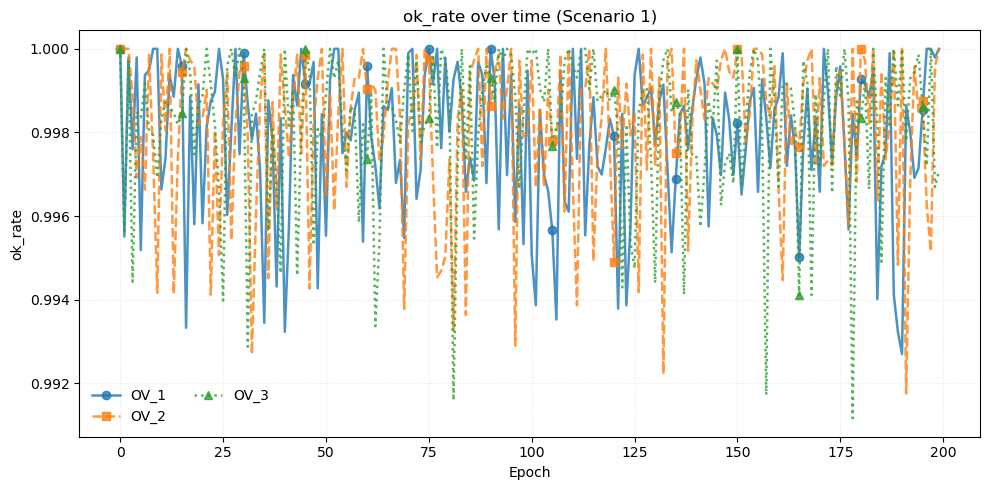

reward_epoch_total_value_TKG_only


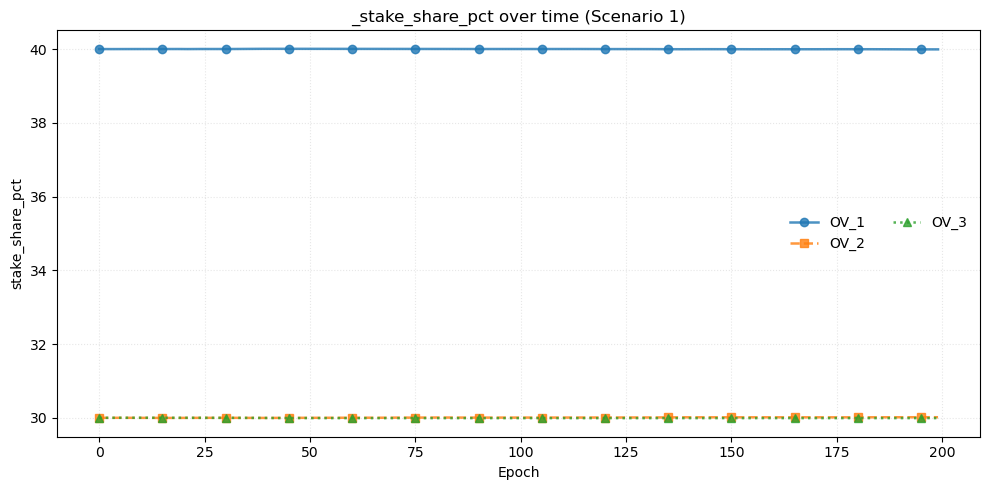

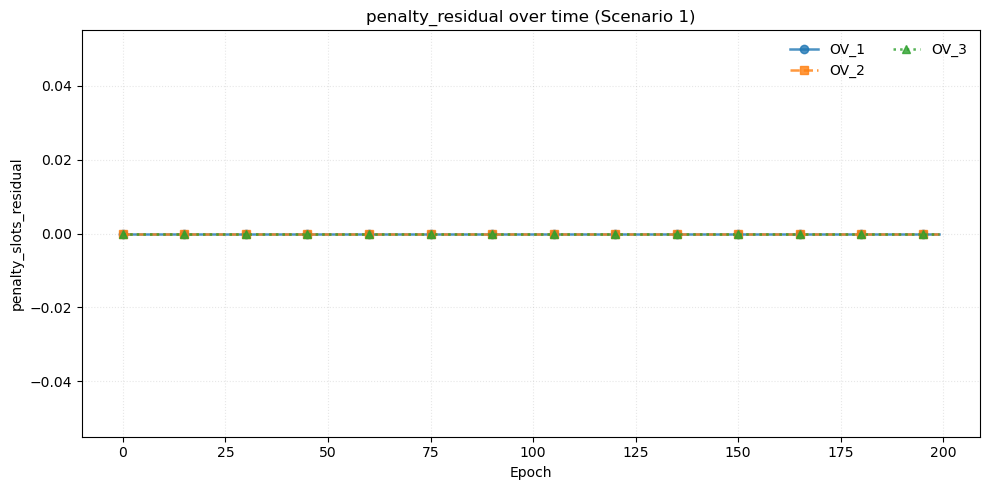

In [25]:
# Palette colori e stili
colors = plt.cm.tab10.colors           # 10 colori diversi
linestyles = ["-", "--", ":", "-."]    # alterna stili per distinguere meglio
markers = ["o", "s", "^", "D", "x", "v", "P", "*"]  # marker visibili

for var in metrics:
    if var not in df1.columns:
        print(var)
        continue  # salta se colonna mancante

    plt.figure(figsize=(10, 5))

    # Ciclo sui nodi con combinazione unica (colore + stile + marker)
    for (nd, color, ls, mk) in zip(nodes, colors, itertools.cycle(linestyles), itertools.cycle(markers)):
        sub = df1[df1["node"] == nd]

        plt.plot(
            sub["epoch"],
            sub[var],
            label=str(nd),
            color=color,
            linestyle=ls,
            marker=mk,
            markevery=15,     # ogni 15 punti mette un marker
            alpha=0.8,        # trasparenza per vedere sovrapposizioni
            linewidth=1.8
        )

    # Titoli e asse
    plt.xlabel("Epoch")
    plt.ylabel(var)
    plt.title(title_map.get(var, f"{var} over time (Scenario 1)"))
    plt.legend(frameon=False, ncol=len(nodes)//2 + 1)
    plt.grid(alpha=0.3, linestyle=":")
    plt.tight_layout()

    # Salva e mostra
    out_path = f"fig/scen1_{var}_timeseries.png"
    plt.savefig(out_path, dpi=200)
    plt.show()


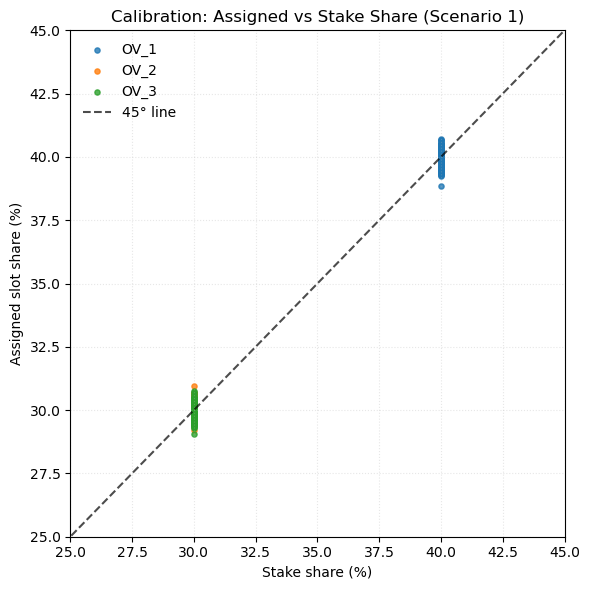

In [26]:
plt.figure(figsize=(6, 6))

# Scatter per ogni nodo
for nd in df1["node"].unique():
    sub = df1[df1["node"] == nd]
    plt.scatter(
        sub["stake_share_pct"],
        sub["share_assigned_slots"],
        s=14,
        label=str(nd),
        alpha=0.8
    )

# Linea 45° coerente con scala 0–100
lo, hi = 0, 100
plt.plot([lo, hi], [lo, hi], color="black", linestyle="--", alpha=0.7, label="45° line")

plt.xlim(25, 45)
plt.ylim(25, 45)
plt.xlabel("Stake share (%)")
plt.ylabel("Assigned slot share (%)")
plt.title("Calibration: Assigned vs Stake Share (Scenario 1)")
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
# --- Salvataggio ---
out_path = "fig/scen1_calibration.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

### DF2

In [27]:
df2 = df2.rename(columns={"overflow": "node"})

metrics = ["ok_rate", "reward_epoch_total_value_TKG_only", "stake_share_pct", "penalty_slots_residual"]
title_map = {
    "ok_rate": "ok_rate over time (Scenario 2)",
    "reward_epoch_total_value_TKG_only": "reward_total over time (Scenario 2)",
    "stake_share_pct": "_stake_share_pct over time (Scenario 2)",
    "penalty_slots_residual": "penalty_residual over time (Scenario 2)",
}

nodes = sorted(df2["node"].unique())
vline_epoch = 10  # linea verticale coerente con lo scenario 2 per confronto visuale

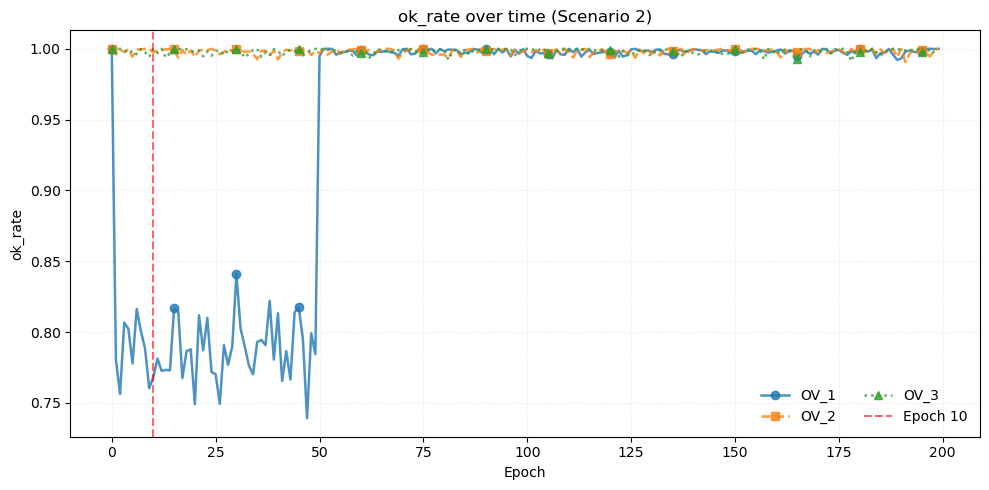

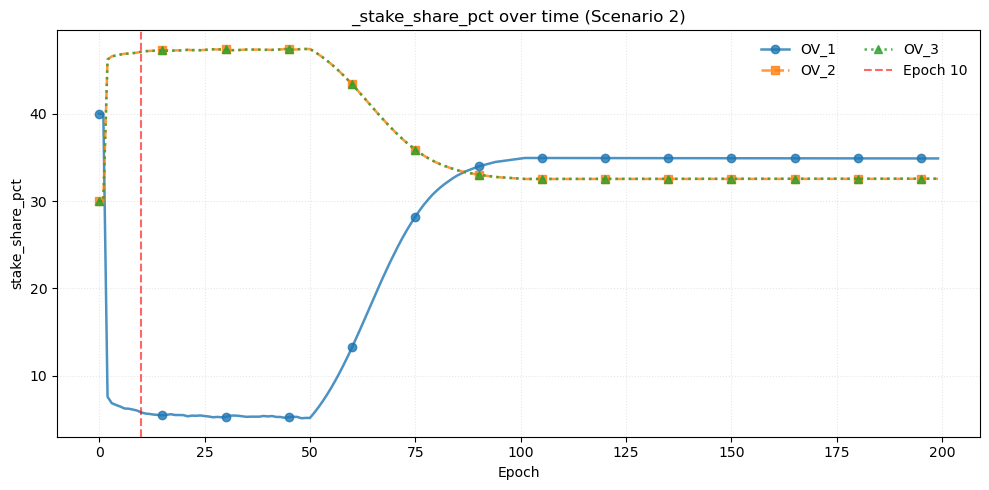

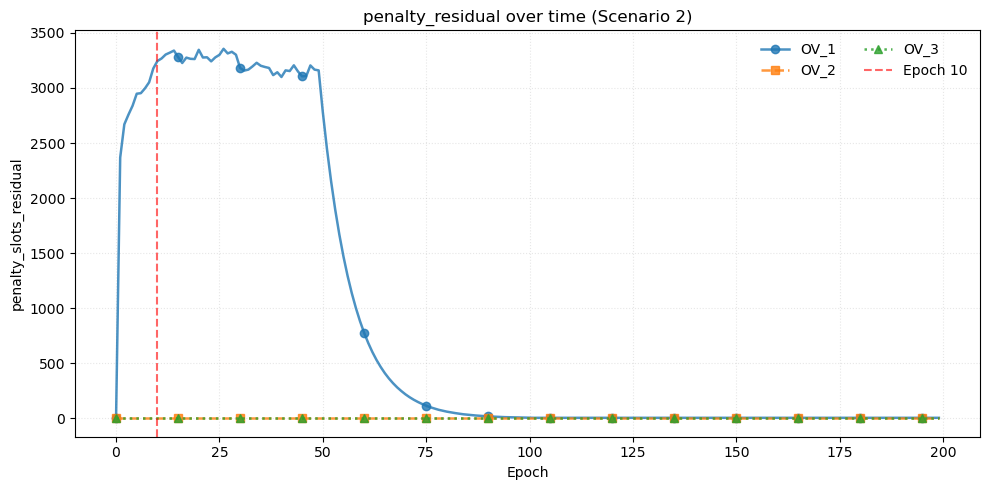

In [28]:
# Palette colori e stili
colors = plt.cm.tab10.colors           # 10 colori diversi
linestyles = ["-", "--", ":", "-."]    # alterna stili per distinguere meglio
markers = ["o", "s", "^", "D", "x", "v", "P", "*"]  # marker visibili

for var in metrics:
    if var not in df2.columns:
        continue  # salta se colonna mancante

    plt.figure(figsize=(10, 5))

    # Ciclo sui nodi con combinazione unica (colore + stile + marker)
    for (nd, color, ls, mk) in zip(nodes, colors, itertools.cycle(linestyles), itertools.cycle(markers)):
        sub = df2[df2["node"] == nd]

        plt.plot(
            sub["epoch"],
            sub[var],
            label=str(nd),
            color=color,
            linestyle=ls,
            marker=mk,
            markevery=15,     # ogni 15 punti mette un marker
            alpha=0.8,        # trasparenza per vedere sovrapposizioni
            linewidth=1.8
        )

    # Linea verticale a epoch 50 (riferimento redenzione)
    plt.axvline(vline_epoch, linestyle="--", color="red", alpha=0.6, label="Epoch 10")

    # Titoli e asse
    plt.xlabel("Epoch")
    plt.ylabel(var)
    plt.title(title_map.get(var, f"{var} over time (Scenario 1)"))
    plt.legend(frameon=False, ncol=len(nodes)//2 + 1)
    plt.grid(alpha=0.3, linestyle=":")
    plt.tight_layout()

    # Salva e mostra
    out_path = f"fig/scen2_{var}_timeseries.png"
    plt.savefig(out_path, dpi=200)
    plt.show()

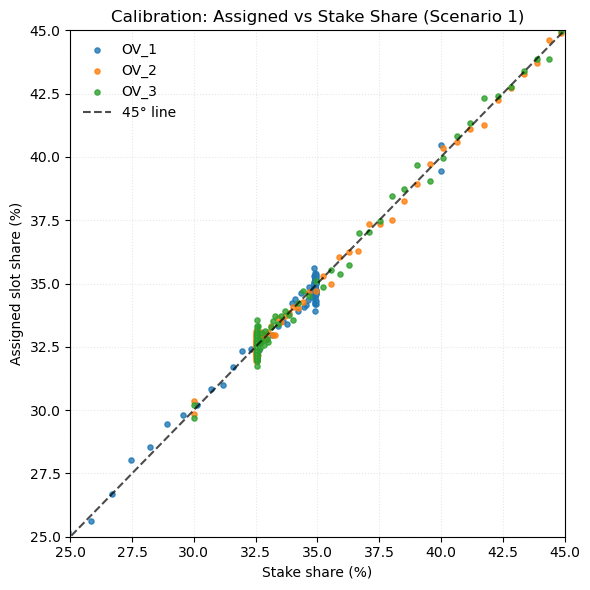

In [29]:
plt.figure(figsize=(6, 6))

# Scatter per ogni nodo
for nd in df2["node"].unique():
    sub = df2[df2["node"] == nd]
    plt.scatter(
        sub["stake_share_pct"],
        sub["share_assigned_slots"],
        s=14,
        label=str(nd),
        alpha=0.8
    )

# Linea 45° coerente con scala 0–100
lo, hi = 0, 100
plt.plot([lo, hi], [lo, hi], color="black", linestyle="--", alpha=0.7, label="45° line")

plt.xlim(25, 45)
plt.ylim(25, 45)
plt.xlabel("Stake share (%)")
plt.ylabel("Assigned slot share (%)")
plt.title("Calibration: Assigned vs Stake Share (Scenario 1)")
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
# --- Salvataggio ---
out_path = "fig/scen2_calibration.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

# New stuff

In [30]:
df1.head()

,epoch,node,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,bad_slots_pct_node,effective_stake,stake_share_pct,effective_stake_next,stake_share_next_pct,delivered_slots_share_pct,coinbase_epoch_tkg,fees_epoch_tkr_at_main,reward_epoch_total_value_tkg_only,coinbase_cum_tkg,fees_cum_tkr_at_main,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,0.00,400.0000,40.0000,400.9470,39.9987,39.4583,0.9470,0.0,0.9470,0.9470,0.0,0,0.0,0,0,0.0,0.0,0.0,189.40,0.0,0.0,1.000000,1,0.394583
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,0.00,300.0000,30.0000,300.7285,30.0008,30.3542,0.7285,0.0,0.7285,0.7285,0.0,0,0.0,0,0,0.0,0.0,0.0,145.70,0.0,0.0,1.000000,1,0.303542
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,0.00,300.0000,30.0000,300.7245,30.0004,30.1875,0.7245,0.0,0.7245,0.7245,0.0,0,0.0,0,0,0.0,0.0,0.0,144.90,0.0,0.0,1.000000,1,0.301875
3,1,OV_1,MAIN_1,9712,40.467,9669,43,0,0,43,0.44,400.9470,39.9987,401.9139,39.9997,40.2875,0.9669,0.0,0.9669,1.9139,0.0,0,0.0,0,0,0.0,0.0,0.0,194.24,0.0,0.0,0.995572,1,0.404667
4,1,OV_2,MAIN_2,7160,29.833,7160,0,0,0,0,0.00,300.7285,30.0008,301.4445,30.0007,29.8333,0.7160,0.0,0.7160,1.4445,0.0,0,0.0,0,0,0.0,0.0,0.0,143.20,0.0,0.0,1.000000,1,0.298333


In [31]:
df2.head()

,epoch,node,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,bad_slots_pct_node,effective_stake,stake_share_pct,effective_stake_next,stake_share_next_pct,delivered_slots_share_pct,coinbase_epoch_tkg,fees_epoch_tkr_at_main,reward_epoch_total_value_tkg_only,coinbase_cum_tkg,fees_cum_tkr_at_main,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,0.00,400.0000,40.0000,400.947000,39.9987,39.4583,0.9470,0.0000,0.9470,0.9470,0.0000,0,0.000,0,0,0.0,0.00,0.0,473.50,0.0,0.00,1.000000,2,0.394583,1,0,0,0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,0.00,300.0000,30.0000,300.728500,30.0008,30.3542,0.7285,0.0000,0.7285,0.7285,0.0000,0,0.000,0,0,0.0,0.00,0.0,364.25,0.0,0.00,1.000000,2,0.303542,0,0,0,0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,0.00,300.0000,30.0000,300.724500,30.0004,30.1875,0.7245,0.0000,0.7245,0.7245,0.0000,0,0.000,0,0,0.0,0.00,0.0,362.25,0.0,0.00,1.000000,2,0.301875,0,0,0,0
3,1,OV_1,MAIN_1,9712,40.467,7577,0,2135,0,2135,21.98,400.9470,39.9987,49.568694,7.5973,31.5708,0.7577,0.0737,0.7577,1.7047,0.0737,2368,7.104,2637,2135,100.0,2367.76,0.0,485.60,0.0,2367.76,0.780169,2,0.404667,1,0,0,0
4,1,OV_2,MAIN_2,7160,29.833,7132,27,1,0,28,0.39,300.7285,30.0008,301.441700,46.2017,29.7167,0.7132,0.0853,0.7132,1.4417,0.0853,0,0.000,0,0,0.0,0.00,0.0,358.00,0.0,0.00,0.996089,2,0.298333,0,0,0,0


In [32]:
df2["post_t"] = df2["epoch"].apply(lambda x:1 if x > 9 else 0)
df2["interaction"] = df2["malicious_i"] * df2["post_t"]
df2["time_since_switch"] = df2["epoch"].apply(lambda x: max(0, x - 9))
df2.head()

,epoch,node,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,bad_slots_pct_node,effective_stake,stake_share_pct,effective_stake_next,stake_share_next_pct,delivered_slots_share_pct,coinbase_epoch_tkg,fees_epoch_tkr_at_main,reward_epoch_total_value_tkg_only,coinbase_cum_tkg,fees_cum_tkr_at_main,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,0.00,400.0000,40.0000,400.947000,39.9987,39.4583,0.9470,0.0000,0.9470,0.9470,0.0000,0,0.000,0,0,0.0,0.00,0.0,473.50,0.0,0.00,1.000000,2,0.394583,1,0,0,0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,0.00,300.0000,30.0000,300.728500,30.0008,30.3542,0.7285,0.0000,0.7285,0.7285,0.0000,0,0.000,0,0,0.0,0.00,0.0,364.25,0.0,0.00,1.000000,2,0.303542,0,0,0,0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,0.00,300.0000,30.0000,300.724500,30.0004,30.1875,0.7245,0.0000,0.7245,0.7245,0.0000,0,0.000,0,0,0.0,0.00,0.0,362.25,0.0,0.00,1.000000,2,0.301875,0,0,0,0
3,1,OV_1,MAIN_1,9712,40.467,7577,0,2135,0,2135,21.98,400.9470,39.9987,49.568694,7.5973,31.5708,0.7577,0.0737,0.7577,1.7047,0.0737,2368,7.104,2637,2135,100.0,2367.76,0.0,485.60,0.0,2367.76,0.780169,2,0.404667,1,0,0,0
4,1,OV_2,MAIN_2,7160,29.833,7132,27,1,0,28,0.39,300.7285,30.0008,301.441700,46.2017,29.7167,0.7132,0.0853,0.7132,1.4417,0.0853,0,0.000,0,0,0.0,0.00,0.0,358.00,0.0,0.00,0.996089,2,0.298333,0,0,0,0


In [33]:
df1.to_csv("dataset/scenario1.csv", index = False)
df2.to_csv("dataset/scenario2.csv", index = False)